<a href="https://colab.research.google.com/github/sharunsha/sharunsha/blob/main/Analyzing_Amazon_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Amazon Sales data**

---







In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data=pd.read_csv('/content/Amazon Sales data (1).csv')

In [63]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [64]:
missing_values=data.isnull().sum()
print("missing_values:\n", missing_values )

missing_values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [65]:
data["Oreder Date"]=pd.to_datetime(data["Order Date"])

In [66]:
data["Year"] = data["Oreder Date"].dt.year
data["Month"] = data["Oreder Date"].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Oreder Date,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05-28,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08-22,2012,8
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05-02,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06-20,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02-01,2013,2


In [67]:
regions = data['Region'].nunique()
print("Number of Regions:",regions)


Number of Regions: 7


In [68]:
country = data['Country'].nunique()
print("Number of Countries:",country)

Number of Countries: 76


In [69]:
#calculate the item types
item_type = data['Item Type'].nunique()
print("Number of Item Types:",item_type)

Number of Item Types: 12


In [70]:
#Calculate the total Unit sold
unit_sold = data['Units Sold'].sum()
print("Total Units Sold:",unit_sold)

Total Units Sold: 512871


In [71]:
#calculate the total unit cost
unit_cost = data['Unit Cost'].sum()
print("Total Unit Cost:",unit_cost)

Total Unit Cost: 19104.8


In [72]:
total_revenue = data['Total Revenue'].sum()
print("Total Revenue:",total_revenue)

Total Revenue: 137348768.31


In [73]:
total_cost = data['Total Cost'].sum()
print("Total Cost:",total_cost)

Total Cost: 93180569.91000001


In [74]:
total_profit = data['Total Profit'].sum()
print("Total Profit:",total_profit)

Total Profit: 44168198.39999999


In [75]:
data.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

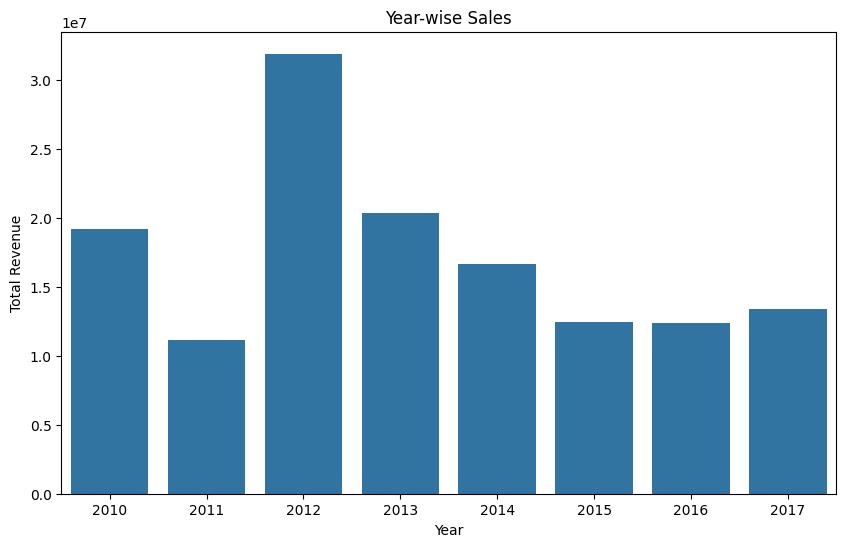

In [76]:
#year wise sales
year_sales = data.groupby('Year')['Total Revenue'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=year_sales.index, y=year_sales.values,)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Year-wise Sales')
plt.show

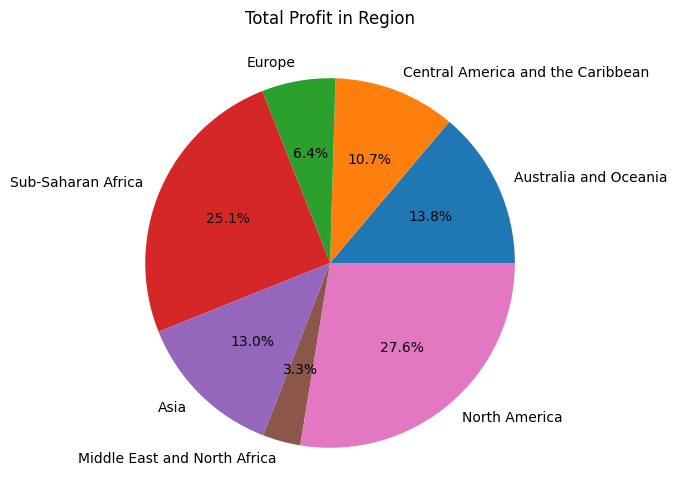

In [77]:
#Pie chart of Total Profit in region wise
plt.figure(figsize=(10, 6))
plt.pie(data.groupby('Region')['Total Profit'].sum(), labels=data['Region'].unique(), autopct='%1.1f%%')
plt.title('Total Profit in Region')
plt.show()

In [78]:
#group total revenue by item type
TotalRevenue_ItemType = data.groupby('Item Type')['Total Revenue'].sum()

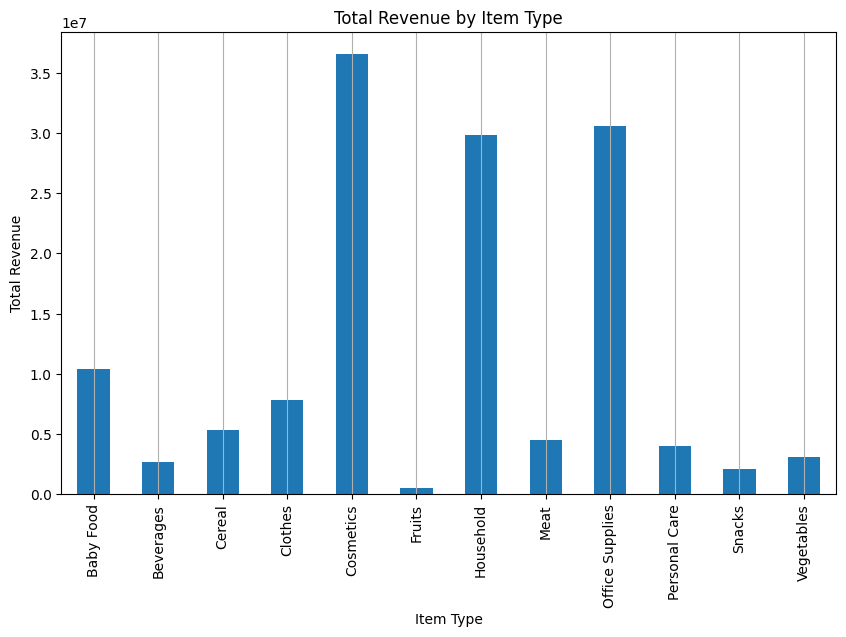

In [79]:
plt.figure(figsize=(10, 6))
TotalRevenue_ItemType.plot(kind='bar')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Item Type')
plt.grid(axis='x')

In [80]:
TotalRevenue_SalesChannel = data.groupby('Sales Channel')['Total Revenue'].sum()

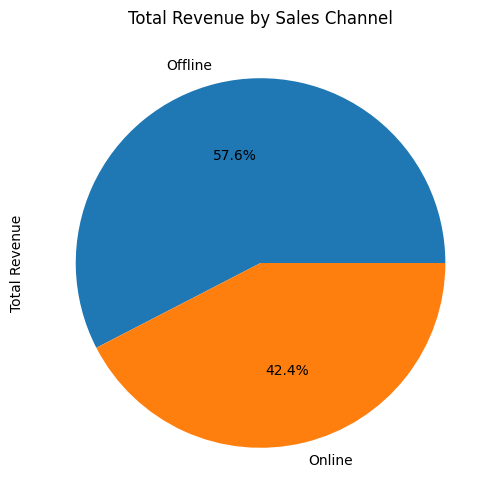

In [81]:
plt.figure(figsize=(10, 6))
plt.tight_layout()
TotalRevenue_SalesChannel.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Revenue by Sales Channel')
plt.show()

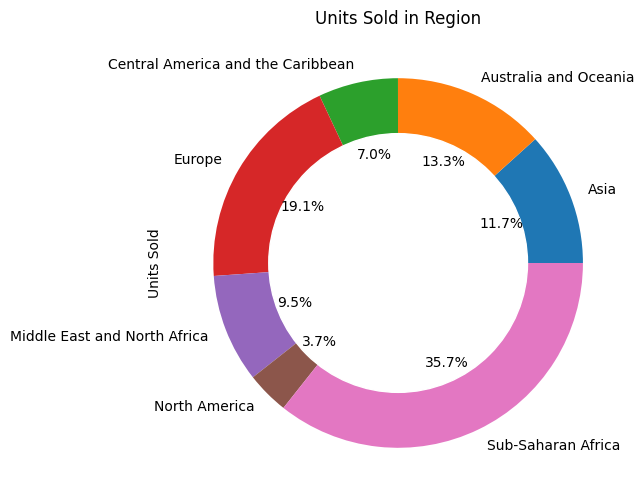

In [82]:
Region_UnitSold = data.groupby('Region')['Units Sold'].sum()
plt.figure(figsize=(10,6))
Region_UnitSold.plot(kind='pie', labels=Region_UnitSold.index, autopct='%1.1f%%',)

cntr_circle = plt.Circle((0,0),0.7,color='white')
fig = plt.gcf()
fig.gca().add_artist(cntr_circle)
plt.title('Units Sold in Region')
plt.show()

# **Yearly_Month wise**

In [83]:
YearMonth_UnitsSold = data.groupby(['Year','Month'])['Units Sold'].sum()

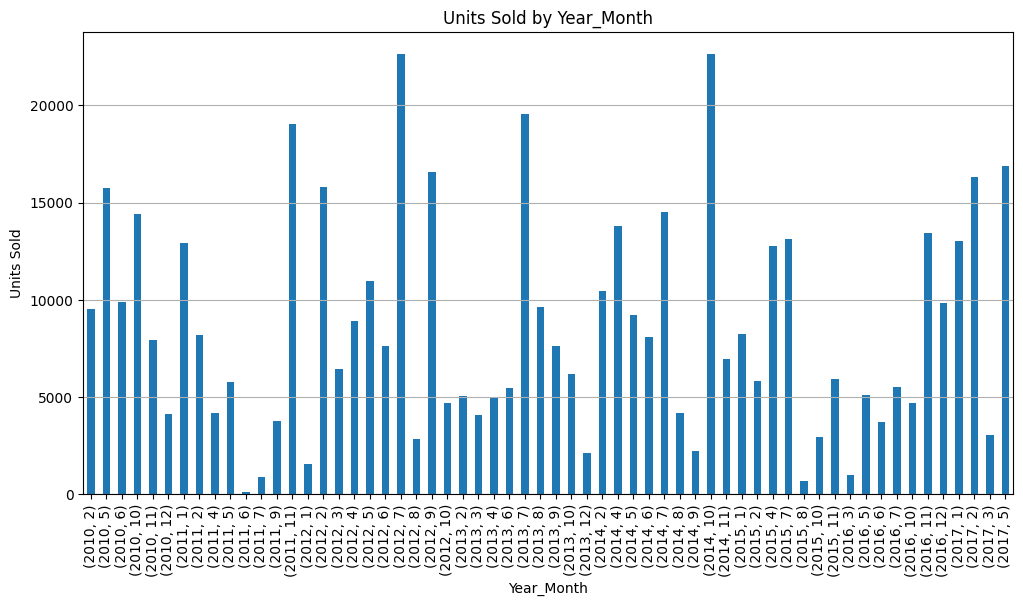

In [84]:
plt.figure(figsize=(12, 6))
YearMonth_UnitsSold.plot(kind='bar')
plt.xlabel('Year_Month')
plt.ylabel('Units Sold')
plt.title('Units Sold by Year_Month')
plt.grid(axis='y')

# **Monthly_wise**

---



In [85]:
YearMonth_UnitsSold = data.groupby(['Month'])['Units Sold'].sum()

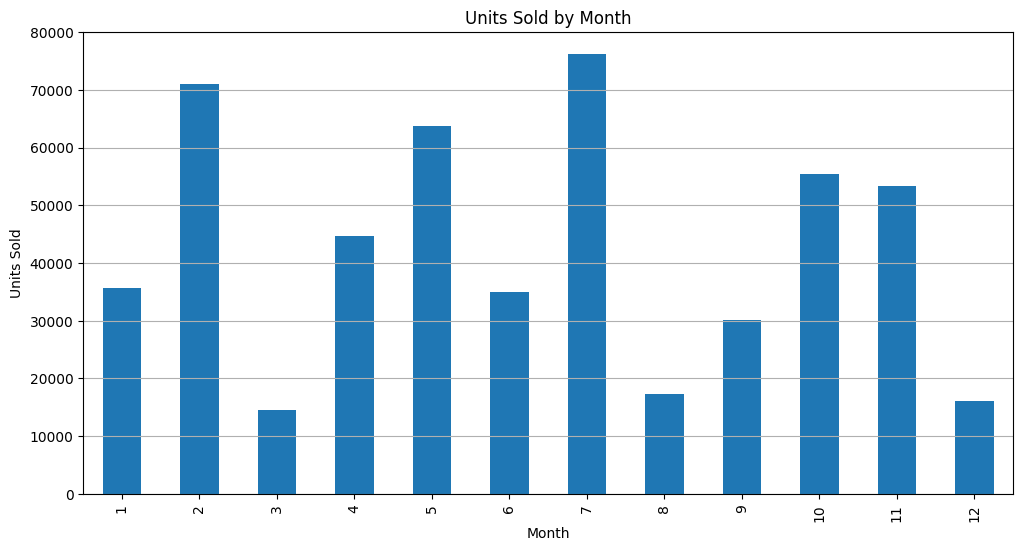

In [86]:
plt.figure(figsize=(12, 6))
YearMonth_UnitsSold.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Units Sold by Month')
plt.grid(axis='y')